In [ ]:
# Thomas algorithm
def Thomas(n,a, b, c, d, phi):

    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)
    c_prime[0] = c[0]/b[0]
    d_prime[0] = d[0]/b[0]
    for i in range(1, n):
        d_prime[i] = (d[i]-a[i-1]*d_prime[i-1])/(b[i]-a[i-1]*c_prime[i-1])
        if i < n-1:
            c_prime[i] = c[i-1]/(b[i]-a[i-1]*c_prime[i-1])
    phi[n-1] = d_prime[n-1]
    for i in range(n-2, -1, -1):
        phi[i] = d_prime[i]-c_prime[i]*phi[i+1]
    return phi

In [ ]:
import numpy as np
N = 40
x = np.arange(0, 1 + 1/N, 1/N)
y = np.arange(0, 1 + 1/N, 1/N)
print(x)
print(y)
np.shape(x)

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]


(41,)

In [ ]:
import math
import numpy as np
import pandas as pd
S_phi = np.zeros((N+1, N+1))  # Create a 2D array for S_phi
x = np.arange(0, 1 + 1/N, 1/N)
y = np.arange(0, 1 + 1/N, 1/N)

for i in range(N+1):
  for j in range(N+1):
    S_phi[i, j] = (2*np.sinh(10*(x[i]-0.5)) + 40*(x[i]-0.5)* np.cosh(10*(x[i]-0.5)) + 100*((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) +
                  2*np.sinh(10*(y[j]-0.5)) + 40*(y[j]-0.5)* np.cosh(10*(y[j]-0.5)) + 100*((y[j]-0.5)**2)*np.sinh(10*(y[j]-0.5)) +
                  4*((x[i]**2)+(y[j]**2))*np.exp(2*x[i]*y[j]))

np.shape(S_phi)
print(np.shape(S_phi))

(41, 41)


In [ ]:
# Boundry Conditions
import numpy as np
import math
phi = np.zeros((N+1, N+1))
for i in range (N+1):
  phi[0][i] = np.sinh(-5)*1/4 + ((y[i]-0.5)**2)*np.sinh(10*(y[i]-0.5)) + 1


  phi[N][i] = np.sinh(5)*1/4 + ((y[i]-0.5)**2)*np.sinh(10*(y[i]-0.5)) + np.exp(2*y[i])


  phi[i][0] = np.sinh(-5)*1/4 + ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + 1


  phi[i][N] = np.sinh(5)*1/4 + ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + np.exp(2*x[i])

# Analytical solution

phi_analytic = np.zeros((N+1, N+1))
for i in range(N+1):
  for j in range(N+1):
    phi_analytic[i][j] = ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + ((y[j]-0.5)**2)*np.sinh(10*(y[j]-0.5)) + np.exp(2*(x[i]-0.5)*(y[j]-0.5))




In [ ]:
# ADI

import numpy as np
import math

dh = 1/N
error = float('inf')
n = 0
a = np.empty(N-2)
b = np.empty(N-1)
c = np.empty(N-2)
d = np.empty(N-1)
a.fill(1)
b.fill(-4)
c.fill(1)
err = np.zeros(6000)

while error > 1e-6:
    error = 0
    n += 1


    if n % 2 == 1:                                                           # ADI sweep in the x-direction
        phi_th = np.zeros(N-1)
        for j in range(1, N):
            for i in range(1, N):
                if i == 1:
                    d[i-1] = S_phi[i][j]*dh*dh - phi[i][j+1] - phi[i][j-1] - phi[i-1][j]
                elif i == N-1:
                  d[i-1] = S_phi[i][j]*dh*dh - phi[i][j+1] - phi[i][j-1] - phi[i+1][j]

                else:
                    d[i-1] = S_phi[i][j]*dh*dh - phi[i][j+1] - phi[i][j-1]
            phi_th = Thomas(N-1,a, b, c, d, phi_th)

            for i in range(1, N):
                phi_n = phi[i][j]
                phi_n_1 = phi_th[i-1]
                error += abs(phi_n - phi_n_1)
                phi[i][j] = phi_th[i-1]


    else:                                                                       # ADI sweep in the y-direction
        phi_th = np.zeros(N-1)
        for i in range(1, N):
            for j in range(1, N):
                if j == 1:
                    d[j-1] = S_phi[i][j]*dh*dh - phi[i+1][j] - phi[i-1][j] - phi[i][j-1]
                elif j == N-1:
                  d[j-1] = S_phi[i][j]*dh*dh - phi[i+1][j] - phi[i-1][j] - phi[i][j+1]

                else:
                    d[j-1] = S_phi[i][j]*dh*dh - phi[i+1][j] - phi[i-1][j]
            phi_th = Thomas(N-1,a, b, c, d, phi_th)
            for j in range(1, N):
                phi_n = phi[i][j]
                phi_n_1 = phi_th[j-1]
                error += abs(phi_n - phi_n_1)
                phi[i][j] = phi_th[j-1]
    err[n] = error
print(n)



1397


In [ ]:
import pandas as pd
import numpy as np
DF = pd.DataFrame(err)
DF.to_csv("/content/err.csv")

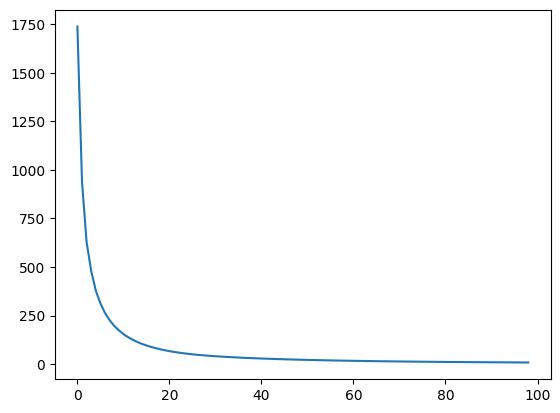

In [ ]:
import matplotlib.pyplot as plt
err = err[1:100]
plt.plot(err)
plt.show()

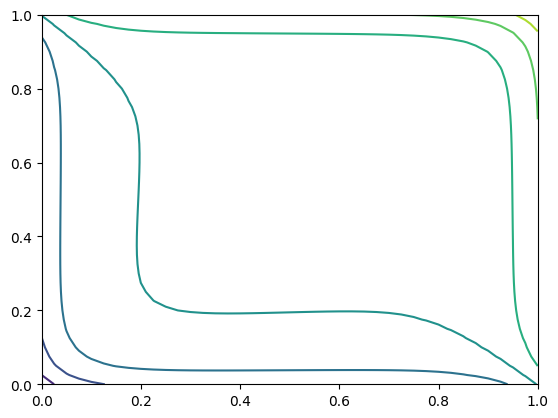

In [ ]:
import matplotlib.pyplot as plt
[X, Y] = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1)
ax.contour(X, Y, phi_analytic)
plt.show()

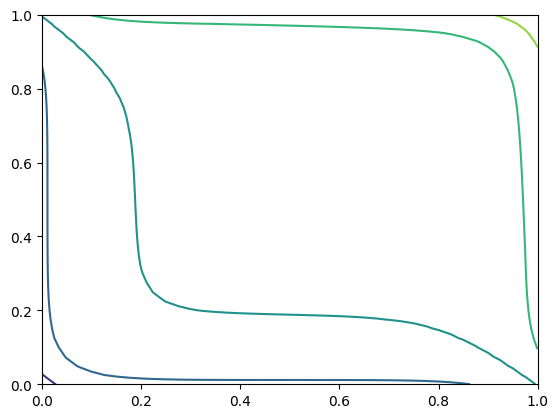

In [ ]:
import matplotlib.pyplot as plt
[X, Y] = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1)
ax.contour(X, Y, phi)
plt.show()

Text(0.5, 0, 'Z')

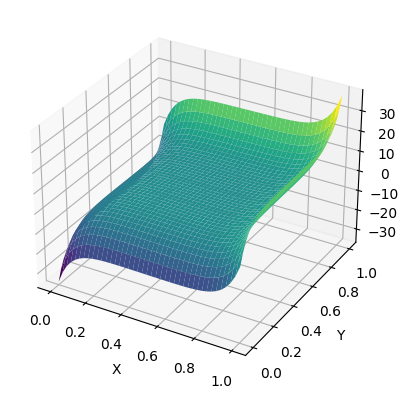

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np



X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, phi_analytic, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

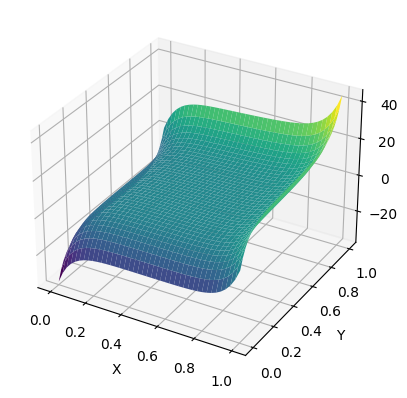

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, phi, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')